In [1]:
import numpy as np
import pandas as pd

#### Object creation
Creating a series by passing the values as we need with default integer index

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print (s.dtype)
print (s)

float64
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


#### Creating dataframe
Creating dataframe from numpy array with datetime index and labeled columns

In [3]:
dates = pd.date_range('20200301',periods=6)
dates

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', freq='D')

Creating dataframe from random numbers from the previously created `dates` dataframe

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609


Creating dataframe by passing a dict of objects that can be converted to series like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Here we can see that each column of the dataframe is having different datatypes (dtypes)

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Pressing <TAB> key shows the list of available options like below

In [7]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

### Viewing data

In [8]:
df.head()

,A,B,C,D
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892


In [9]:
df2.tail(3)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


displaying the indexes and columns

In [10]:
df.index, df2.index

(DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
                '2020-03-05', '2020-03-06'],
               dtype='datetime64[ns]', freq='D'),
 Int64Index([0, 1, 2, 3], dtype='int64'))

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

### to_numpy
Converts dataframe object to numpy array
** Is an expensive operation when the dataframe has different datatypes because of fundamental difference between pandas and numpy
**  That is because, **numpy has one dtype for the entire array whereas pandas dataframe have one dtype for entire column**
** to_numpy() will find the NumPy dtype equivalent which can hold all of the dataframe. i.e., object type (python)

In [13]:
df.to_numpy()

array([[-0.30242328,  1.01367312, -0.69679601, -1.07252986],
       [-0.18214472,  1.58921623, -2.39824742, -0.65839236],
       [ 1.13374497,  0.90128597,  0.29083011,  0.71848351],
       [ 0.39680609,  0.51730485,  0.97038742, -0.75501634],
       [ 0.37369994, -0.25046982, -1.91626963, -1.77489178],
       [-0.97879976, -0.81149924, -0.60012013, -0.45460915]])

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

#### Note : 
This conversion from pandas to numpy will not include the index or column labels in the output array

#### describe

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.073481,0.493252,-0.725036,-0.666159
std,0.725641,0.882558,1.276050,0.820289
min,-0.978800,-0.811499,-2.398247,-1.774892
25%,-0.272354,-0.058526,-1.611401,-0.993151
50%,0.095778,0.709295,-0.648458,-0.706704
75%,0.391030,0.985576,0.068093,-0.505555
max,1.133745,1.589216,0.970387,0.718484


### Transpose -
Getting the transpose of the given dataframe

In [16]:
df.T

,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00
A,-0.302423,-0.182145,1.133745,0.396806,0.373700,-0.978800
B,1.013673,1.589216,0.901286,0.517305,-0.250470,-0.811499
C,-0.696796,-2.398247,0.290830,0.970387,-1.916270,-0.600120
D,-1.072530,-0.658392,0.718484,-0.755016,-1.774892,-0.454609


Sorting by an axis

In [18]:
print(df)
df.sort_index(axis=1, ascending=False)
#df.sort_index(axis=0, ascending=False)

                   A         B         C         D
2020-03-01 -0.302423  1.013673 -0.696796 -1.072530
2020-03-02 -0.182145  1.589216 -2.398247 -0.658392
2020-03-03  1.133745  0.901286  0.290830  0.718484
2020-03-04  0.396806  0.517305  0.970387 -0.755016
2020-03-05  0.373700 -0.250470 -1.916270 -1.774892
2020-03-06 -0.978800 -0.811499 -0.600120 -0.454609


,D,C,B,A
2020-03-01,-1.072530,-0.696796,1.013673,-0.302423
2020-03-02,-0.658392,-2.398247,1.589216,-0.182145
2020-03-03,0.718484,0.290830,0.901286,1.133745
2020-03-04,-0.755016,0.970387,0.517305,0.396806
2020-03-05,-1.774892,-1.916270,-0.250470,0.373700
2020-03-06,-0.454609,-0.600120,-0.811499,-0.978800


Sorting by values

In [20]:
print (df)
df.sort_values(by='C')

                   A         B         C         D
2020-03-01 -0.302423  1.013673 -0.696796 -1.072530
2020-03-02 -0.182145  1.589216 -2.398247 -0.658392
2020-03-03  1.133745  0.901286  0.290830  0.718484
2020-03-04  0.396806  0.517305  0.970387 -0.755016
2020-03-05  0.373700 -0.250470 -1.916270 -1.774892
2020-03-06 -0.978800 -0.811499 -0.600120 -0.454609


,A,B,C,D
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016


### Selection 

We recommend to use the standard optimized pandas data access methods 
viz., `.at, .iat, .loc, .iloc`

`df.A` is equivalent to `df['A']`

In [21]:
df['A']

2020-03-01   -0.302423
2020-03-02   -0.182145
2020-03-03    1.133745
2020-03-04    0.396806
2020-03-05    0.373700
2020-03-06   -0.978800
Freq: D, Name: A, dtype: float64

In [22]:
df.A

2020-03-01   -0.302423
2020-03-02   -0.182145
2020-03-03    1.133745
2020-03-04    0.396806
2020-03-05    0.373700
2020-03-06   -0.978800
Freq: D, Name: A, dtype: float64

selecting slices via [] operator

In [23]:
df[:3]

,A,B,C,D
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484


In [24]:
df[1:4]

,A,B,C,D
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016


In [25]:
df['20200301':'20200303']

,A,B,C,D
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484


Notice the method used above will get data inclusive of both the end elements as well 

### Selection by label

In [27]:
print(dates[0])
df.loc[dates[0]]

2020-03-01 00:00:00


A   -0.302423
B    1.013673
C   -0.696796
D   -1.072530
Name: 2020-03-01 00:00:00, dtype: float64

selection by multi-axis labels

In [28]:
df.loc[:, ['A', 'B']] ## selecting A and B for all rows

,A,B
2020-03-01,-0.302423,1.013673
2020-03-02,-0.182145,1.589216
2020-03-03,1.133745,0.901286
2020-03-04,0.396806,0.517305
2020-03-05,0.373700,-0.250470
2020-03-06,-0.978800,-0.811499


In [29]:
df.loc['20200302':'20200304', ['A', 'B', 'C']] ## loc operator uses first parameter for rows filter
## and second parameter for column options

,A,B,C
2020-03-02,-0.182145,1.589216,-2.398247
2020-03-03,1.133745,0.901286,0.290830
2020-03-04,0.396806,0.517305,0.970387


Reducing the dimensions of the object

In [30]:
df.loc['20200303',['A','B']] ## achieving the dimensionality reduction here as we can see the shape changes to (1,2)

A    1.133745
B    0.901286
Name: 2020-03-03 00:00:00, dtype: float64

For faster access to a scalar value, we can use the `.at` method

In [31]:
df.at[dates[0], 'A']

-0.3024232827531073

### Selection by position

In [32]:
df.iloc[3] ## equivalent to displaying the columns in top to bottom order

A    0.396806
B    0.517305
C    0.970387
D   -0.755016
Name: 2020-03-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, :2] ## this iloc can be used for row positioning and column positioning put together with comma (;) and colon(:)

,A,B
2020-03-04,0.396806,0.517305
2020-03-05,0.373700,-0.250470


Similar to python/numpy

In [34]:
df.iloc[[1,2,4],[0,2]] ## same as above without slicing

,A,C
2020-03-02,-0.182145,-2.398247
2020-03-03,1.133745,0.290830
2020-03-05,0.373700,-1.916270


For fetching needed rows with all columns

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484


In [36]:
df.iloc[:, 1:3]

,B,C
2020-03-01,1.013673,-0.696796
2020-03-02,1.589216,-2.398247
2020-03-03,0.901286,0.290830
2020-03-04,0.517305,0.970387
2020-03-05,-0.250470,-1.916270
2020-03-06,-0.811499,-0.600120


for getting value explicitly

In [37]:
df.iloc[1,1]

1.5892162335590765

In [38]:
df.iat[1,1] ## equivalent to iloc but faster ; applicable only for scalar

1.5892162335590765

### Boolean indexing

In [39]:
df[df.A > 0] ## equivalent to A > 0

,A,B,C,D
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892


In [40]:
df[df > 0] ## note that values that are less than 0 appear as NaN due to pandas nomenclature when boolean False come

,A,B,C,D
2020-03-01,NaN,1.013673,NaN,NaN
2020-03-02,NaN,1.589216,NaN,NaN
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,NaN
2020-03-05,0.373700,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN


##### isin() method

In [41]:
df2 = df.copy() ## copying df to df2 

In [42]:
df2

,A,B,C,D
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392
2020-03-03,1.133745,0.901286,0.290830,0.718484
2020-03-04,0.396806,0.517305,0.970387,-0.755016
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609


In [43]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530,one
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392,one
2020-03-03,1.133745,0.901286,0.290830,0.718484,two
2020-03-04,0.396806,0.517305,0.970387,-0.755016,three
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892,four
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609,three


In [44]:
print (df2['E'].isin(['two','four']))
df2[df2.E.isin(['two','four'])]

2020-03-01    False
2020-03-02    False
2020-03-03     True
2020-03-04    False
2020-03-05     True
2020-03-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2020-03-03,1.133745,0.901286,0.29083,0.718484,two
2020-03-05,0.373700,-0.250470,-1.91627,-1.774892,four


##### Setting 

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200301', periods=6))
s1

2020-03-01    1
2020-03-02    2
2020-03-03    3
2020-03-04    4
2020-03-05    5
2020-03-06    6
Freq: D, dtype: int64

In [48]:
df['F'] = s1

In [49]:
df

,A,B,C,D,F
2020-03-01,-0.302423,1.013673,-0.696796,-1.072530,1
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392,2
2020-03-03,1.133745,0.901286,0.290830,0.718484,3
2020-03-04,0.396806,0.517305,0.970387,-0.755016,4
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892,5
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609,6


setting values by label

In [50]:
df.at[dates[0], 'A'] = 0

In [51]:
df.at[dates[2], 'C']

0.2908301073718101

setting values by position

In [52]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-03-01,0.000000,0.000000,-0.696796,-1.072530,1
2020-03-02,-0.182145,1.589216,-2.398247,-0.658392,2
2020-03-03,1.133745,0.901286,0.290830,0.718484,3
2020-03-04,0.396806,0.517305,0.970387,-0.755016,4
2020-03-05,0.373700,-0.250470,-1.916270,-1.774892,5
2020-03-06,-0.978800,-0.811499,-0.600120,-0.454609,6


Setting by numpy array

In [53]:
df.loc[:, 'D'] = np.array([3] * len(df)) ## updating column D to 5 for all rows (getting length from df)

In [54]:
df

,A,B,C,D,F
2020-03-01,0.000000,0.000000,-0.696796,3,1
2020-03-02,-0.182145,1.589216,-2.398247,3,2
2020-03-03,1.133745,0.901286,0.290830,3,3
2020-03-04,0.396806,0.517305,0.970387,3,4
2020-03-05,0.373700,-0.250470,-1.916270,3,5
2020-03-06,-0.978800,-0.811499,-0.600120,3,6


where operation

In [56]:
df2 = df.copy()
print (df2)
df2[df2 > 0] = -df2
df2

                   A         B         C  D  F
2020-03-01  0.000000  0.000000 -0.696796  3  1
2020-03-02 -0.182145  1.589216 -2.398247  3  2
2020-03-03  1.133745  0.901286  0.290830  3  3
2020-03-04  0.396806  0.517305  0.970387  3  4
2020-03-05  0.373700 -0.250470 -1.916270  3  5
2020-03-06 -0.978800 -0.811499 -0.600120  3  6


,A,B,C,D,F
2020-03-01,0.000000,0.000000,-0.696796,-3,-1
2020-03-02,-0.182145,-1.589216,-2.398247,-3,-2
2020-03-03,-1.133745,-0.901286,-0.290830,-3,-3
2020-03-04,-0.396806,-0.517305,-0.970387,-3,-4
2020-03-05,-0.373700,-0.250470,-1.916270,-3,-5
2020-03-06,-0.978800,-0.811499,-0.600120,-3,-6


## Missing data
np.nan stands for missing value (NULL in db)

reindexing allows us to change/add/delete the index on a specified axis returning copy of the data.

In [57]:
df1 = df.reindex(index=dates[0:4], columns = list(df.columns) + ['E'])
print (df1)
df1.loc[dates[0]:dates[1], 'E'] = 1
print (df1)

                   A         B         C  D  F   E
2020-03-01  0.000000  0.000000 -0.696796  3  1 NaN
2020-03-02 -0.182145  1.589216 -2.398247  3  2 NaN
2020-03-03  1.133745  0.901286  0.290830  3  3 NaN
2020-03-04  0.396806  0.517305  0.970387  3  4 NaN
                   A         B         C  D  F    E
2020-03-01  0.000000  0.000000 -0.696796  3  1  1.0
2020-03-02 -0.182145  1.589216 -2.398247  3  2  1.0
2020-03-03  1.133745  0.901286  0.290830  3  3  NaN
2020-03-04  0.396806  0.517305  0.970387  3  4  NaN


To drop any rows having missing values

In [58]:
print (df1)
df1.dropna(how='any')
print (df1)

                   A         B         C  D  F    E
2020-03-01  0.000000  0.000000 -0.696796  3  1  1.0
2020-03-02 -0.182145  1.589216 -2.398247  3  2  1.0
2020-03-03  1.133745  0.901286  0.290830  3  3  NaN
2020-03-04  0.396806  0.517305  0.970387  3  4  NaN
                   A         B         C  D  F    E
2020-03-01  0.000000  0.000000 -0.696796  3  1  1.0
2020-03-02 -0.182145  1.589216 -2.398247  3  2  1.0
2020-03-03  1.133745  0.901286  0.290830  3  3  NaN
2020-03-04  0.396806  0.517305  0.970387  3  4  NaN


To fillin any missing values

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2020-03-01,0.000000,0.000000,-0.696796,3,1,1.0
2020-03-02,-0.182145,1.589216,-2.398247,3,2,1.0
2020-03-03,1.133745,0.901286,0.290830,3,3,5.0
2020-03-04,0.396806,0.517305,0.970387,3,4,5.0


getting boolean mask for these nan

In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2020-03-01,False,False,False,False,False,False
2020-03-02,False,False,False,False,False,False
2020-03-03,False,False,False,False,False,True
2020-03-04,False,False,False,False,False,True


### Operations

#### Stats 
Operations in general exclude missing data. Descriptive stats : 

In [61]:
df.mean() ## giving mean of each columns

A    0.123884
B    0.324306
C   -0.725036
D    3.000000
F    3.500000
dtype: float64

In [62]:
df.mean(1) ## giving mean of all rows taken along the column order

2020-03-01    0.660641
2020-03-02    0.801765
2020-03-03    1.665172
2020-03-04    1.776900
2020-03-05    1.241392
2020-03-06    1.321916
Freq: D, dtype: float64

Notice the use of shift in the below function . re-ordering the values as given in the series

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2020-03-01    NaN
2020-03-02    NaN
2020-03-03    1.0
2020-03-04    3.0
2020-03-05    5.0
2020-03-06    NaN
Freq: D, dtype: float64

In [64]:
print (df)
df.sub(s, axis = 'index')
print (df)

                   A         B         C  D  F
2020-03-01  0.000000  0.000000 -0.696796  3  1
2020-03-02 -0.182145  1.589216 -2.398247  3  2
2020-03-03  1.133745  0.901286  0.290830  3  3
2020-03-04  0.396806  0.517305  0.970387  3  4
2020-03-05  0.373700 -0.250470 -1.916270  3  5
2020-03-06 -0.978800 -0.811499 -0.600120  3  6
                   A         B         C  D  F
2020-03-01  0.000000  0.000000 -0.696796  3  1
2020-03-02 -0.182145  1.589216 -2.398247  3  2
2020-03-03  1.133745  0.901286  0.290830  3  3
2020-03-04  0.396806  0.517305  0.970387  3  4
2020-03-05  0.373700 -0.250470 -1.916270  3  5
2020-03-06 -0.978800 -0.811499 -0.600120  3  6


#### Apply functioning to the data

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2020-03-01,0.000000,0.000000,-0.696796,3,1
2020-03-02,-0.182145,1.589216,-3.095043,6,3
2020-03-03,0.951600,2.490502,-2.804213,9,6
2020-03-04,1.348406,3.007807,-1.833826,12,10
2020-03-05,1.722106,2.757337,-3.750096,15,15
2020-03-06,0.743307,1.945838,-4.350216,18,21


In [67]:
print(df)
df.apply(lambda x: x.max() - x.min())

                   A         B         C  D  F
2020-03-01  0.000000  0.000000 -0.696796  3  1
2020-03-02 -0.182145  1.589216 -2.398247  3  2
2020-03-03  1.133745  0.901286  0.290830  3  3
2020-03-04  0.396806  0.517305  0.970387  3  4
2020-03-05  0.373700 -0.250470 -1.916270  3  5
2020-03-06 -0.978800 -0.811499 -0.600120  3  6


A    2.112545
B    2.400715
C    3.368635
D    0.000000
F    5.000000
dtype: float64

### Histogramming

In [68]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    3
2    0
3    4
4    2
5    6
6    5
7    6
8    4
9    6
dtype: int32

In [69]:
s.value_counts() ## gets the count aggregates of each value

6    3
5    2
4    2
3    1
2    1
0    1
dtype: int64

### String methods

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge and concat
combining together dataframe series with various set logics for index and algebra functionality in case of join/merge.

use `concat` method

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.823019,-0.293493,-0.007486,-1.271903
1,-0.717306,0.054224,-0.205220,-0.409524
2,-1.153596,-1.091193,-0.051291,0.495554
3,-0.338924,0.735174,-1.637267,-0.316619
4,0.188861,0.199436,1.008767,0.551588
5,-0.080336,0.068241,-0.159832,-0.460273
6,-1.336840,-0.388117,0.810030,-1.904062
7,-0.811348,-1.235592,1.405526,-1.405693
8,-0.862580,0.107567,1.106539,0.368699
9,0.322143,-0.055795,-0.809917,-0.805291


In [72]:
## breaking into various pieces

In [73]:
pieces = [df[:3], df[3:7], df[7:]]
print (pieces)
pd.concat(pieces)

[          0         1         2         3
0 -0.823019 -0.293493 -0.007486 -1.271903
1 -0.717306  0.054224 -0.205220 -0.409524
2 -1.153596 -1.091193 -0.051291  0.495554,           0         1         2         3
3 -0.338924  0.735174 -1.637267 -0.316619
4  0.188861  0.199436  1.008767  0.551588
5 -0.080336  0.068241 -0.159832 -0.460273
6 -1.336840 -0.388117  0.810030 -1.904062,           0         1         2         3
7 -0.811348 -1.235592  1.405526 -1.405693
8 -0.862580  0.107567  1.106539  0.368699
9  0.322143 -0.055795 -0.809917 -0.805291]


,0,1,2,3
0,-0.823019,-0.293493,-0.007486,-1.271903
1,-0.717306,0.054224,-0.205220,-0.409524
2,-1.153596,-1.091193,-0.051291,0.495554
3,-0.338924,0.735174,-1.637267,-0.316619
4,0.188861,0.199436,1.008767,0.551588
5,-0.080336,0.068241,-0.159832,-0.460273
6,-1.336840,-0.388117,0.810030,-1.904062
7,-0.811348,-1.235592,1.405526,-1.405693
8,-0.862580,0.107567,1.106539,0.368699
9,0.322143,-0.055795,-0.809917,-0.805291


Note : 
    Adding column to dataframe is faster but **row requires taking a copy and is expensive**.
    So recommended approach is to **pre-built a list of records to dataframe constructor** instead of building a dataframe
    This will iteratively append records to it.

### Join
SQL style merging 

In [74]:
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'], 'rval':[4,5]})
print (left)
print (right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [75]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Grouping

In [76]:
df = pd.DataFrame({'A':['foo','bar','foo','bar',
                       'foo','bar','foo','foo'],
                   'B':['one','one','two','three',
                       'two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.415754,0.644208
1,bar,one,0.480321,-0.298176
2,foo,two,0.146073,1.156982
3,bar,three,-2.040525,-0.898344
4,foo,two,2.556560,0.706096
5,bar,two,0.110310,0.778567
6,foo,one,-0.073243,-0.118636
7,foo,three,0.344294,-0.562730


Grouping and applying sum()

In [79]:
print(df)
df.groupby(['A', 'B']).sum()

     A      B         C         D
0  foo    one -0.415754  0.644208
1  bar    one  0.480321 -0.298176
2  foo    two  0.146073  1.156982
3  bar  three -2.040525 -0.898344
4  foo    two  2.556560  0.706096
5  bar    two  0.110310  0.778567
6  foo    one -0.073243 -0.118636
7  foo  three  0.344294 -0.562730


C         D
A   B                        
bar one    0.480321 -0.298176
    three -2.040525 -0.898344
    two    0.110310  0.778567
foo one   -0.488996  0.525573
    three  0.344294 -0.562730
    two    2.702633  1.863078

In [80]:
print(df)
df.groupby('A').sum()

     A      B         C         D
0  foo    one -0.415754  0.644208
1  bar    one  0.480321 -0.298176
2  foo    two  0.146073  1.156982
3  bar  three -2.040525 -0.898344
4  foo    two  2.556560  0.706096
5  bar    two  0.110310  0.778567
6  foo    one -0.073243 -0.118636
7  foo  three  0.344294 -0.562730


,C,D
A,,
bar,-1.449895,-0.417953
foo,2.557931,1.825921


### Reshaping / restacking

In [81]:
tuples = list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                   ['one','two','one','two',
                    'one','two','one','two']]))
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [82]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df2 = df[:4]
print (df2)
print (df)

                     A         B
first second                    
bar   one     0.879299  0.240690
      two     0.478590 -0.470911
baz   one     0.098274  1.762076
      two     0.721107  1.119505
                     A         B
first second                    
bar   one     0.879299  0.240690
      two     0.478590 -0.470911
baz   one     0.098274  1.762076
      two     0.721107  1.119505
foo   one    -1.677110 -0.018725
      two    -0.199965  0.489083
qux   one    -0.807603  0.639776
      two     0.503017 -1.006925


Stack method compresses a level in the dataframe

In [84]:
print (df2)
stacked = df2.stack()
stacked

                     A         B
first second                    
bar   one     0.879299  0.240690
      two     0.478590 -0.470911
baz   one     0.098274  1.762076
      two     0.721107  1.119505


first  second   
bar    one     A    0.879299
               B    0.240690
       two     A    0.478590
               B   -0.470911
baz    one     A    0.098274
               B    1.762076
       two     A    0.721107
               B    1.119505
dtype: float64

In [85]:
stacked.unstack()

A         B
first second                    
bar   one     0.879299  0.240690
      two     0.478590 -0.470911
baz   one     0.098274  1.762076
      two     0.721107  1.119505

In [87]:
print (stacked)
stacked.unstack(0)

first  second   
bar    one     A    0.879299
               B    0.240690
       two     A    0.478590
               B   -0.470911
baz    one     A    0.098274
               B    1.762076
       two     A    0.721107
               B    1.119505
dtype: float64


first          bar       baz
second                      
one    A  0.879299  0.098274
       B  0.240690  1.762076
two    A  0.478590  0.721107
       B -0.470911  1.119505

### Pivot Tables

In [88]:
df = pd.DataFrame({'A' : ['one','one','two','three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.090055,-1.009228
1,one,B,foo,-0.659244,-0.340205
2,two,C,foo,0.936957,-0.077155
3,three,A,bar,-0.537181,0.613082
4,one,B,bar,-0.348572,1.186294
5,one,C,bar,0.809750,0.792583
6,two,A,foo,0.141365,-0.112597
7,three,B,foo,-0.364194,1.672501
8,one,C,foo,-1.283796,0.018313
9,one,A,bar,0.638712,-1.367941


In [90]:
print (df)
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

        A  B    C         D         E
0     one  A  foo  1.090055 -1.009228
1     one  B  foo -0.659244 -0.340205
2     two  C  foo  0.936957 -0.077155
3   three  A  bar -0.537181  0.613082
4     one  B  bar -0.348572  1.186294
5     one  C  bar  0.809750  0.792583
6     two  A  foo  0.141365 -0.112597
7   three  B  foo -0.364194  1.672501
8     one  C  foo -1.283796  0.018313
9     one  A  bar  0.638712 -1.367941
10    two  B  bar -0.312863 -0.003973
11  three  C  bar -0.381608  1.444698


C             bar       foo
A     B                    
one   A  0.638712  1.090055
      B -0.348572 -0.659244
      C  0.809750 -1.283796
three A -0.537181       NaN
      B       NaN -0.364194
      C -0.381608       NaN
two   A       NaN  0.141365
      B -0.312863       NaN
      C       NaN  0.936957

### Time series
Simple, powerful, efficient functionality for resampling operations using frequency conversion viz., convering seconds data to 5-minutes data.

In [91]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print (rng[:5])
print (ts[:5])

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')
2012-01-01 00:00:00    192
2012-01-01 00:00:01    206
2012-01-01 00:00:02    357
2012-01-01 00:00:03    377
2012-01-01 00:00:04    317
Freq: S, dtype: int32


In [92]:
ts.resample('5Min').sum()

2012-01-01    23665
Freq: 5T, dtype: int32

Timezone representation

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
print (rng)
print (ts)

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')
2012-03-06    1.404938
2012-03-07    1.508525
2012-03-08   -0.299993
2012-03-09    0.108629
2012-03-10    1.536436
Freq: D, dtype: float64


In [95]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.404938
2012-03-07 00:00:00+00:00    1.508525
2012-03-08 00:00:00+00:00   -0.299993
2012-03-09 00:00:00+00:00    0.108629
2012-03-10 00:00:00+00:00    1.536436
Freq: D, dtype: float64

convert to another timezone

In [96]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.404938
2012-03-06 19:00:00-05:00    1.508525
2012-03-07 19:00:00-05:00   -0.299993
2012-03-08 19:00:00-05:00    0.108629
2012-03-09 19:00:00-05:00    1.536436
Freq: D, dtype: float64

conversion between time span representations

In [97]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print (rng)
print (ts)

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')
2012-01-31    0.645976
2012-02-29    0.022336
2012-03-31    0.693319
2012-04-30    1.331851
2012-05-31    0.641671
Freq: M, dtype: float64


In [98]:
ps = ts.to_period()
ps

2012-01    0.645976
2012-02    0.022336
2012-03    0.693319
2012-04    1.331851
2012-05    0.641671
Freq: M, dtype: float64

In [99]:
ps.to_timestamp()

2012-01-01    0.645976
2012-02-01    0.022336
2012-03-01    0.693319
2012-04-01    1.331851
2012-05-01    0.641671
Freq: MS, dtype: float64

above is a conversion from period and timestamp which helps us to do some arithmetic functions like below

In [100]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
print (prng)
print (ts)

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')
1990Q1    0.529070
1990Q2    0.742389
1990Q3    1.090376
1990Q4   -1.694140
1991Q1    0.537996
1991Q2    1.347309
1991Q3    0.571332
1991Q4    0.328936
1992Q1   -0.635954
1992Q2   -0.505461
1992Q3   -1.698000
1992Q4    0.365792
1993Q1    1.824263
1993Q2    0.746931
1993Q3   -0.208882
1993Q4    0.621727
1994Q1   -0.339997
1994Q2   -1.550491
1994Q3   -1.046433
1994Q4    0.641632
1995Q1    0.709427
1995Q2 

In [101]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.529070
1990-06-01 09:00    0.742389
1990-09-01 09:00    1.090376
1990-12-01 09:00   -1.694140
1991-03-01 09:00    0.537996
Freq: H, dtype: float64

### Categoricals

In [102]:
df = pd.DataFrame({'id' : [1,2,3,4,5,6],
                   'raw_grade' : ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [103]:
df['grade'] = df.raw_grade.astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [104]:
df.grade.cat.categories = ['very good', 'good', 'very bad']

In [105]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [106]:
## Series.cat returns a new series
df.grade = df.grade.cat.set_categories(['very bad', 'bad', 'medium',
                                        'good', 'very good'])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [107]:
## soring the categories 
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

In [108]:
import matplotlib.pyplot as plt
plt.close('all')

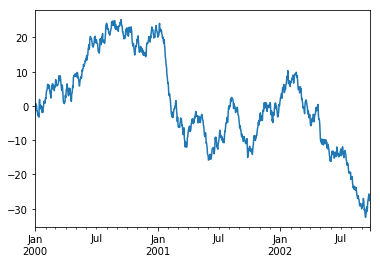

In [109]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods = 1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [111]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df[:10]

,A,B,C,D
2000-01-01,-0.298815,0.892106,-1.600235,0.113118
2000-01-02,-1.035234,2.682114,-1.593059,1.200937
2000-01-03,0.284006,2.433213,-3.354408,2.741137
2000-01-04,0.804812,2.326732,-3.070011,2.916958
2000-01-05,0.131594,1.813194,-4.550162,2.322508
2000-01-06,1.578040,0.228758,-5.438653,2.303773
2000-01-07,0.759394,-0.408687,-4.659599,2.450620
2000-01-08,2.409557,-0.423274,-5.202361,3.216367
2000-01-09,3.142155,0.614592,-4.348372,4.602084
2000-01-10,3.437543,0.914213,-4.004447,4.145185


<Figure size 432x288 with 0 Axes>

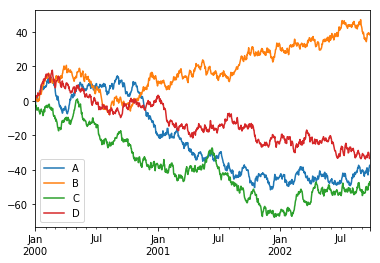

In [112]:
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()